<a href="https://colab.research.google.com/github/malihasama07/Python/blob/main/Copy_of_Final_Lab_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Milestone 1: Data Understanding & Exploration
- Load the diabetes dataset using scikit-learn and display the first five rows
- Perform descriptive statistics (mean, median, min, max) and summarize class balance
- Visualize the distributions of at least two features using histograms or box plots

In [24]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load Diabetes dataset
diabetes = load_diabetes(as_frame=True)
df_diabetes = diabetes.frame
print("\nDiabetes Dataset:")
print(df_diabetes.head())



Diabetes Dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [25]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [26]:
statstic = df.describe().T
statstic["median"] = df.median()

print(statstic)



        count          mean        std        min        25%         50%  \
age     442.0 -2.511817e-19   0.047619  -0.107226  -0.037299    0.005383   
sex     442.0  1.230790e-17   0.047619  -0.044642  -0.044642   -0.044642   
bmi     442.0 -2.245564e-16   0.047619  -0.090275  -0.034229   -0.007284   
bp      442.0 -4.797570e-17   0.047619  -0.112399  -0.036656   -0.005670   
s1      442.0 -1.381499e-17   0.047619  -0.126781  -0.034248   -0.004321   
s2      442.0  3.918434e-17   0.047619  -0.115613  -0.030358   -0.003819   
s3      442.0 -5.777179e-18   0.047619  -0.102307  -0.035117   -0.006584   
s4      442.0 -9.042540e-18   0.047619  -0.076395  -0.039493   -0.002592   
s5      442.0  9.293722e-17   0.047619  -0.126097  -0.033246   -0.001947   
s6      442.0  1.130318e-17   0.047619  -0.137767  -0.033179   -0.001078   
target  442.0  1.521335e+02  77.093005  25.000000  87.000000  140.500000   

               75%         max      median  
age       0.038076    0.110727    0.005383

Class Balance: The Diabetes dataset is a regression dataset, meaning target is numeric, not classes.

In [27]:
df["target_class"] = pd.qcut(df["target"], q=3, labels=["Low", "Medium", "High"])
print(df["target_class"].value_counts())

target_class
High      148
Low       147
Medium    147
Name: count, dtype: int64


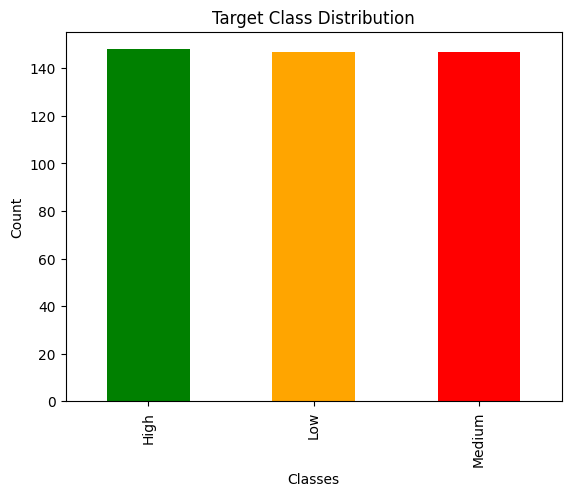

In [28]:
import matplotlib.pyplot as plt

df["target_class"].value_counts().plot(kind="bar", color=["green","orange","red"])
plt.title("Target Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

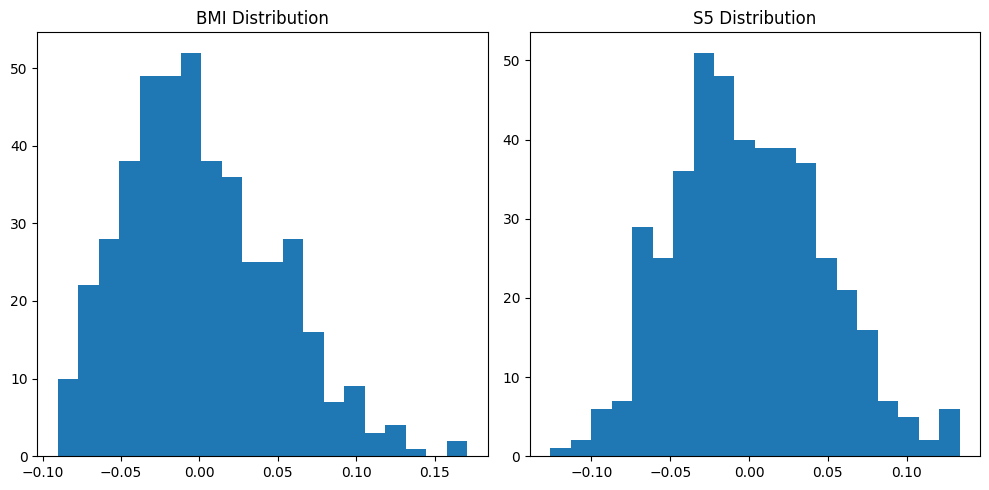

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(df["bmi"], bins=20)
plt.title("BMI Distribution")

plt.subplot(1,2,2)
plt.hist(df["s5"], bins=20)
plt.title("S5 Distribution")

plt.tight_layout()
plt.show()


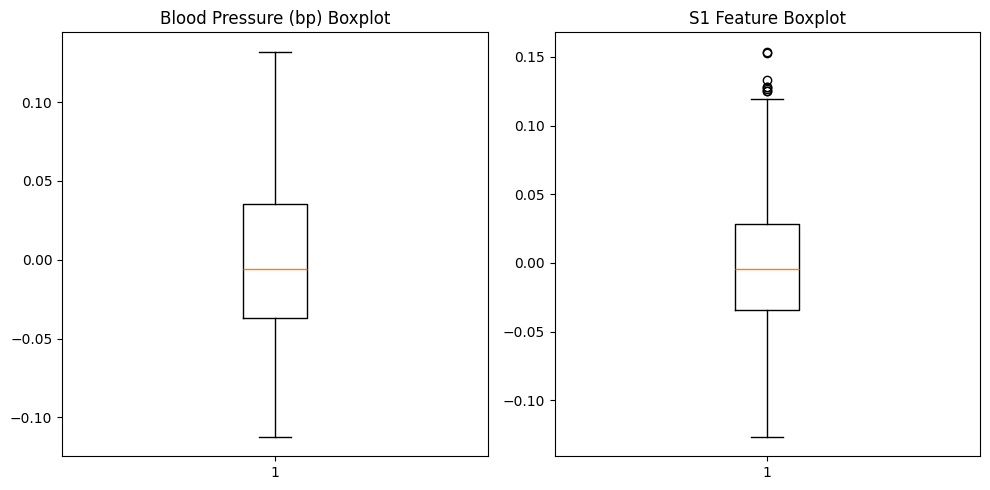

In [30]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.boxplot(df["bp"])
plt.title("Blood Pressure (bp) Boxplot")

plt.subplot(1,2,2)
plt.boxplot(df["s1"])
plt.title("S1 Feature Boxplot")

plt.tight_layout()
plt.show()

Milestone 2: Data Preparation & Preprocessing
- Handle any missing values, duplicates, or outliers in the dataset
- Apply feature scaling/normalization
- Encode categorical variables (if present) with a suitable technique
- Perform basic correlation analysis and point out highly correlated features

In [31]:
print(df.isnull().sum())


age             0
sex             0
bmi             0
bp              0
s1              0
s2              0
s3              0
s4              0
s5              0
s6              0
target          0
target_class    0
dtype: int64


In [32]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [10]:
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]


print("Before:", df.shape)
print("After removing outliers:", df_clean.shape)


Before: (442, 12)
After removing outliers: (411, 12)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df_clean.drop(columns=["target", "target_class"], errors="ignore")
y = df_clean["target"]
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.791643,1.057618,1.387274,0.475036,-0.914381,-0.735956,-0.965239,-0.008754,0.502595,-0.357814
1,-0.038370,-0.945521,-1.097898,-0.559797,-0.098425,-0.381106,1.753429,-0.843510,-1.439854,-2.043873
2,1.772567,1.057618,1.008581,-0.116297,-0.945764,-0.721762,-0.710363,-0.008754,0.127349,-0.545154
3,-1.849308,-0.945521,-0.222171,-0.781547,0.372319,0.619572,-0.795322,0.826002,0.563798,-0.170475
4,0.112541,-0.945521,-0.766542,0.475036,0.184022,0.406662,0.224178,-0.008754,-0.639798,-1.013504


In [34]:
X_encoded = pd.get_dummies(df_clean, drop_first=True)

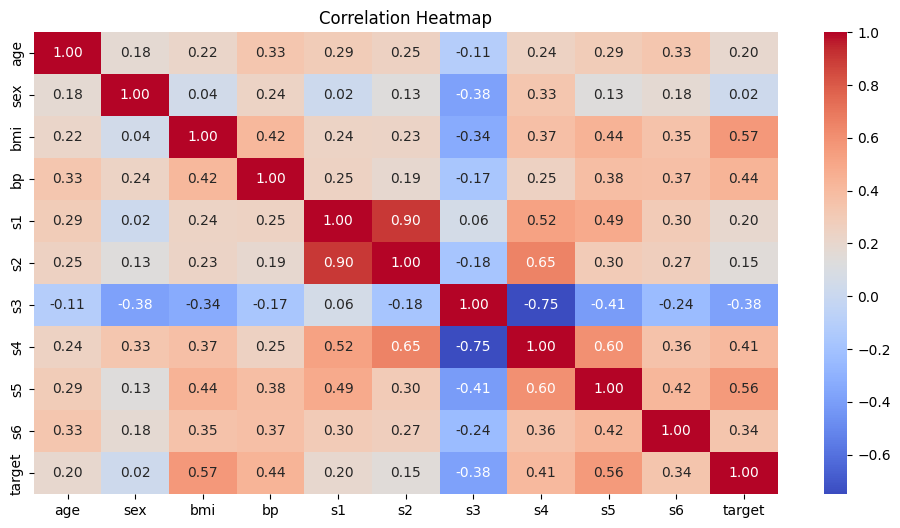

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df_clean.select_dtypes(include=[np.number])

plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [36]:
numeric_df = df_clean.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
target_corr = corr_matrix["target"].sort_values(ascending=False)

print("Correlation with target:\n")
print(target_corr)

Correlation with target:

target    1.000000
bmi       0.568104
s5        0.558874
bp        0.437351
s4        0.409703
s6        0.341035
age       0.199981
s1        0.198914
s2        0.151457
sex       0.024965
s3       -0.382829
Name: target, dtype: float64


Milestone 3: Model Selection & Training
- Split the dataset into training and test sets with a suitable ratio
- Choose and train at least two machine learning models (e.g., logistic regression, random forest)
- Include hyperparameter tuning with cross-validation for one chosen model

In [37]:
from sklearn.model_selection import train_test_split

numeric_df = df_clean.select_dtypes(include=['number'])

X = numeric_df.drop("target", axis=1)
y = numeric_df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (328, 10)
Test Shape: (83, 10)


In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)

grid = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [42]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}


In [43]:
best_rf = grid.best_estimator_


Milestone 4: Model Evaluation & Interpretation
- Evaluate the trained models with appropriate metrics (accuracy, ROC-AUC, precision, recall)
- Plot and interpret a confusion matrix for the best model

In [44]:

y_class = df_clean["target_class"]

X = df_clean.select_dtypes(include=['number']).drop(columns=["target"], errors="ignore")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

In [45]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(max_iter=200, multi_class="ovr")
log_clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='ovr')

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": log_clf,
    "Random Forest": rf_clf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average="weighted"))
    print("Recall:", recall_score(y_test, y_pred, average="weighted"))
    print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))



Logistic Regression
Accuracy: 0.5662650602409639
Precision: 0.5440414254420278
Recall: 0.5662650602409639
F1 Score: 0.5006897197065778

Random Forest
Accuracy: 0.5301204819277109
Precision: 0.5273109243697478
Recall: 0.5301204819277109
F1 Score: 0.5204093838790629


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_test_bin = label_binarize(y_test, classes=["Low", "Medium", "High"])
y_pred_prob = rf_clf.predict_proba(X_test)

roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class="ovr")
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.2796155066972548


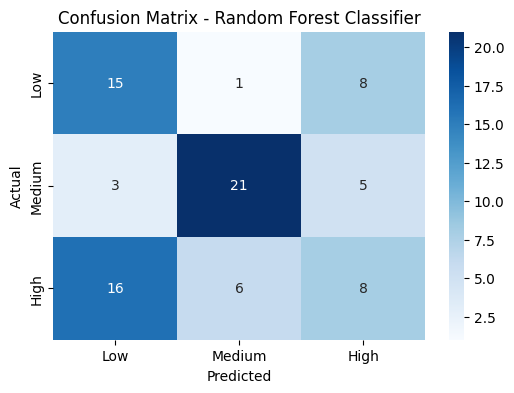

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

Milestone 5: Deployment & Reporting
- save your final trained model for later use
- load the model and making a new prediction

In [ ]:
import joblib

joblib.dump(rf_clf, "final_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [ ]:
import joblib

loaded_model = joblib.load("final_model.pkl")

print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
new_data = pd.DataFrame([{
    "age": 0.02,
    "sex": -0.04,
    "bmi": 0.04,
    "bp": 0.03,
    "s1": -0.02,
    "s2": -0.03,
    "s3": 0.01,
    "s4": -0.02,
    "s5": 0.05,
    "s6": -0.01
}])


In [ ]:
prediction = loaded_model.predict(new_data)

print("Prediction:", prediction[0])


Prediction: High


In [ ]:
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
scaler_loaded = joblib.load("scaler.pkl")


In [ ]:
new_data_scaled = scaler_loaded.transform(new_data)

prediction = loaded_model.predict(new_data_scaled)
print("Prediction:", prediction[0])


Prediction: High


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
pred_proba = loaded_model.predict_proba(new_data_scaled)
print("Prediction Probabilities:", pred_proba)


Prediction Probabilities: [[0.51 0.1  0.39]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
